# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv('craftcans.csv', na_values=["", "N/A", "unknown", "NULL", "Does not apply"])
df.head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42.0


## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [5]:
df.groupby('Brewery')['Size'].value_counts().to_frame().sort_values(by=['count'], ascending=False)

,,count
Brewery,Size,
Brewery Vivant,16 oz.,58
Oskar Blues Brewery,12 oz.,33
Hopworks Urban Brewery,16 oz.,23
Sun King Brewing Company,16 oz.,22
Cigar City Brewing Company,12 oz.,21
...,...,...
Anthem Brewing Company,12 oz,1
Frankenmuth Brewery,12 oz,1
Santa Cruz Mountain Brewing,12 oz.,1


## What is the most common ABV? (alcohol by volume)

In [6]:
df.groupby('ABV').value_counts().to_frame().sort_values(by=['count'], ascending=False).head(20)

count
ABV    Beer                                 Brewery                             Location            Style                               Size   IBUs        
3.90%  Nonstop Hef Hop                      Hopworks Urban Brewery              Portland, OR        American Pale Wheat Ale             16 oz. 20.0      12
6.50%  Dale's Pale Ale                      Oskar Blues Brewery                 Longmont, CO        American Pale Ale (APA)             12 oz. 65.0       3
5.60%  1327 Pod's ESB                       Blue Blood Brewing Company          Lincoln, NE         Extra Special / Strong Bitter (ESB) 12 oz. 37.0       3
6.30%  Dagger Falls IPA                     Sockeye Brewing Company             Boise, ID           American IPA                        12 oz. 100.0      3
5.00%  Main St. Virginia Ale                Center of the Universe Brewing C... Ashland, VA         Altbier                             12 oz. 40.0       2
       Special Amber                        Sprecher Brewing Company            Glendale, WI        Vienna Lager                        12 oz. 22.0       2
4.90%  Hell or High Watermelon Wheat (2009) 21st Amendment Brewery              San Francisco, CA   Fruit / Vegetable Beer              12 oz. 17.0       2
6.00%  Green Monsta IPA                     Wachusett Brewing Company           Westminster, MA     American IPA                        12 oz. 55.0       2
4.90%  Boston Lager                         Boston Beer Company                 Boston, MA          Vienna Lager                        12 oz. 30.0       2
4.60%  Longboard Island Lager               Kona Brewing Company                Kona, HI            American Amber / Red Lager          12 oz. 18.0       2
6.80%  Modus Hoperandi                      Ska Brewing Company                 Durango, CO         American IPA                        12 oz. 65.0       2
5.90%  Morning Wood Wheat (Current)         Pug Ryan's Brewery                  Dillon, CO          American Pale Wheat Ale             12 oz. 14.0       2
5.70%  Barney Flats Oatmeal Stout           Anderson Valley Brewing Company     Boonville, CA       Oatmeal Stout                       12 oz. 13.0       2
8.20%  Hop Slayer Double IPA (2011)         Wild Onion Brewing Company          Lake Barrington, IL American Double / Imperial IPA      12 oz. 100.0      2
8.00%  Heady Topper                         The Alchemist                       Waterbury, VT       American Double / Imperial IPA      16 oz. 120.0      2
4.70%  Point Special                        Stevens Point Brewery               Stevens Point, WI   American Adjunct Lager              12 oz. 9.0        2
10.00% 4Beans                               Sixpoint Craft Ales                 Brooklyn, NY        Baltic Porter                       12 oz. 52.0       1
6.40%  Fistful of Hops Green                Sun King Brewing Company            Indianapolis, IN    American IPA                        16 oz. 75.0       1
       Laughing Dog IPA                     Laughing Dog Brewing Company        Ponderay, ID        American IPA                        12 oz. 66.0       1
       Fistful Of Hops Blue                 Sun King Brewing Company            Indianapolis, IN    American IPA                        16 oz  75.0       1

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [8]:
df['ABV'].str.replace("%", "")

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

In [9]:
df['ABV'] = df['ABV'].str.replace("%", "")

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [10]:
df['ABV'] = df['ABV'].astype(float)

In [11]:
df['ABV'].dtype

dtype('float64')

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

array([[<Axes: title={'center': 'ABV'}>,
        <Axes: title={'center': 'IBUs'}>]], dtype=object)

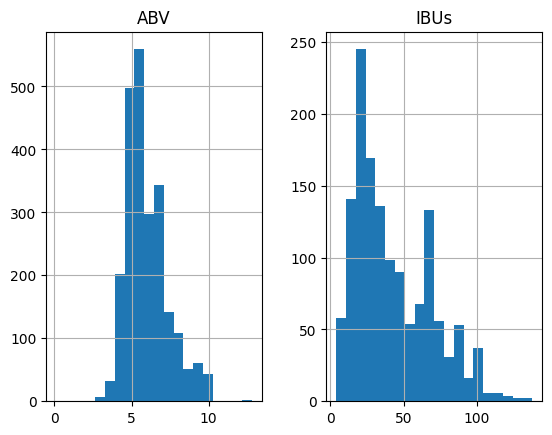

In [12]:
df.hist(bins=20)

In [13]:
df['ABV'].describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [14]:
df['ABV'].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [15]:
df.columns

Index(['Beer', 'Brewery', 'Location', 'Style', 'Size', 'ABV', 'IBUs'], dtype='object')

In [16]:
df['Location'].value_counts().to_frame().sort_values(by=['count'], ascending=False).head(10)

,count
Location,
"Grand Rapids, MI",66
"Chicago, IL",55
"Portland, OR",52
"Indianapolis, IN",43
"San Diego, CA",42
"Boulder, CO",41
"Denver, CO",40
"Brooklyn, NY",38
"Seattle, WA",35


## List all of the beer from Brooklyn, NY

In [17]:
df['Beer'][df['Location'] == "Brooklyn, NY"].to_frame()

,Beer
115,4Beans
210,Jammer
246,Abigale
404,Nomader Weiss
421,Rad
439,Molotov Lite
588,Bengali
713,Sensi Harvest
969,Hi-Res
987,KelSo Nut Brown Lager


## What brewery in Brooklyn puts out the most different cans of beer?

In [18]:
df[df['Location'] == "Brooklyn, NY"].groupby('Brewery')['Beer'].count().to_frame

<bound method Series.to_frame of Brewery
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Sixpoint Craft Ales    24
Name: Beer, dtype: int64>

## What are the five most common styles of beer produced by Sixpoint?

In [19]:
df[df['Brewery'] == "Sixpoint Craft Ales"]['Style'].value_counts().to_frame().sort_values(by='count', ascending=False)

,count
Style,
American IPA,4
Baltic Porter,2
American Double / Imperial IPA,2
German Pilsener,2
Cream Ale,2
Rye Beer,2
Gose,1
Belgian Pale Ale,1
Fruit / Vegetable Beer,1


## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [20]:
df['state'] = df['Location'].str.split(', ').str[1]

In [21]:
df[df['state'] == 'NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0,NY
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0,NY
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN,NY
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN,NY
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0,NY
...,...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN,NY
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN,NY
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN,NY
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN,NY


### Now *count* all of the breweries in New York state

In [22]:
df[df['state'] == 'NY']['Brewery'].nunique()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [23]:
df[df['Beer'].str.contains(r"\bIPA\b", case=False, na=True)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state
48,Titan IPA,Great Divide Brewing Company,"Denver, CO",American IPA,12 oz.,7.1,NaN,CO
61,Grapefruit IPA,Perrin Brewing Company,"Comstock Park, MI",American IPA,12 oz.,5.0,35.0,MI
92,Linnaeus Mango IPA,Brewery Vivant,"Grand Rapids, MI",American IPA,16 oz.,6.0,NaN,MI
104,Galaxy IPA,Big Muddy Brewing,"Murphysboro, IL",American IPA,16 oz.,7.5,60.0,IL
107,Mosaic Single Hop IPA,Lost Nation Brewing,"East Fairfield, VT",American IPA,16 oz.,5.5,NaN,VT
...,...,...,...,...,...,...,...,...
2382,Caldera IPA,Caldera Brewing Company,"Ashland, OR",American IPA,12 oz.,6.1,94.0,OR
2387,Big Swell IPA,Maui Brewing Company,"Lahaina, HI",American IPA,12 oz.,6.2,65.0,HI
2394,113 IPA,Sly Fox Brewing Company,"Pottstown, PA",American IPA,12 oz.,7.0,113.0,PA
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,CA


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [25]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

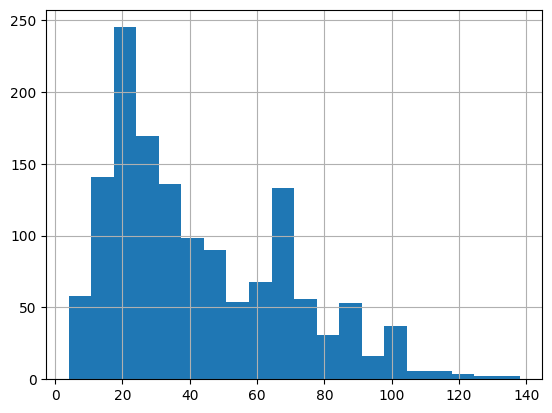

In [27]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [30]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [33]:
df.query('IBUs > 64')

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,KY
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0,MA
...,...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,CA
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0,CO
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,CO
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0,CO


## List all of the beers with IBUs below the 25th percentile

In [34]:
df.query('IBUs < 21')

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,MN
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0,KY
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0,KY
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0,KY
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0,MA
...,...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0,TX
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0,HI
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0,PA
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0,MN


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

<Axes: ylabel='Style'>

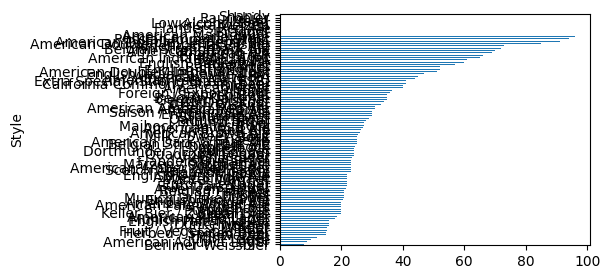

In [54]:
df.groupby('Style')['IBUs'].median().sort_values(na_position='last').plot(x='IBUs', y='Style',kind='barh', figsize=(4,3)
                                                                        )

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [59]:
df.query('IBUs > 64')['Style'].value_counts().to_frame().head(5)

,count
Style,
American IPA,195
American Double / Imperial IPA,72
American Pale Ale (APA),18
American Black Ale,15
American Strong Ale,9


In [60]:
df.query('IBUs < 21')['Style'].value_counts().to_frame().head(5)

,count
Style,
American Pale Wheat Ale,43
American Blonde Ale,36
Fruit / Vegetable Beer,28
Hefeweizen,21
Witbier,20


## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [71]:
df[df['Style'].str.contains("Wheat", case=False, na=True)].value_counts('Style')

Style
American Pale Wheat Ale    97
American Dark Wheat Ale     7
Wheat Ale                   1
Name: count, dtype: int64

In [70]:
df[df['Style'].str.contains("Hefe", case=False, na=True)].value_counts('Style')

Style
Hefeweizen    40
Name: count, dtype: int64

In [77]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale', 'American Dark Wheat Ale', 'Wheat Ale'])]['IBUs'].mean()

np.float64(19.389830508474578)

## Draw a histogram of the IBUs of those beers

<Axes: >

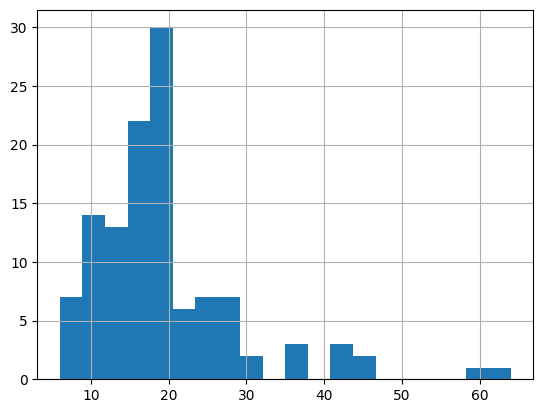

In [79]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale', 'American Dark Wheat Ale', 'Wheat Ale'])]['IBUs'].hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [80]:
df[df['Style'].str.contains("IPA", case=False, na=True)].value_counts('Style')

Style
American IPA                      424
American Double / Imperial IPA    105
Belgian IPA                        18
English India Pale Ale (IPA)       13
American White IPA                 11
Name: count, dtype: int64

<Axes: >

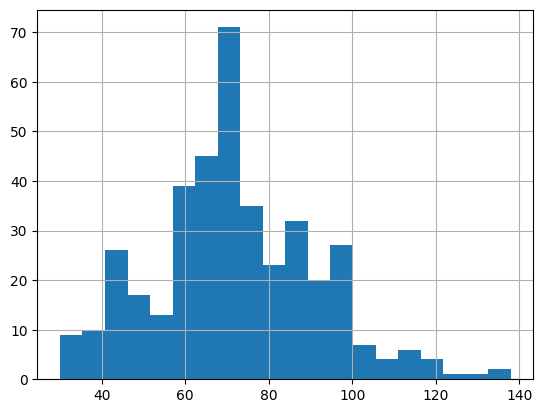

In [81]:
df[df['Style'].isin(['American IPA', 'American Double / Imperial IPA', 'Belgian IPA', 'English India Pale Ale (IPA)', 'American White IPA', 'American White IPA '])]['IBUs'].hist(bins=20)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<bound method Axes.plot of <Axes: >>

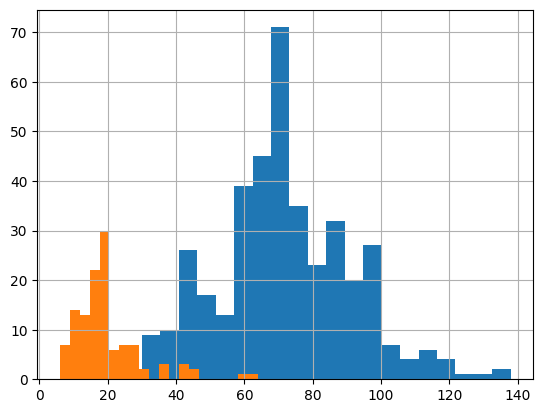

In [99]:
df[df['Style'].isin(['American IPA', 'American Double / Imperial IPA', 'Belgian IPA', 'English India Pale Ale (IPA)', 'American White IPA', 'American White IPA '])]['IBUs'].hist(bins=20)
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale', 'American Dark Wheat Ale', 'Wheat Ale'])]['IBUs'].hist(bins=20).plot

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [100]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale', 'American Dark Wheat Ale', 'Wheat Ale'])]['ABV'].mean()

np.float64(5.054736842105264)

In [102]:
df[df['Style'].isin(['American IPA', 'American Double / Imperial IPA', 'Belgian IPA', 'English India Pale Ale (IPA)', 'American White IPA', 'American White IPA '])]['ABV'].mean()

np.float64(6.879285714285714)

## Good work!